# Principal Component Analysis Network

In [12]:
# import numpy as np
# import random
# from operator import sub, add
# from itertools import permutations 


# l=100
# samples = np.random.multivariate_normal([0,0,0,0], [[100, 141.4, 173.2, 200], [141.4, 200, 244.9, 282.8], [173.2, 244.9, 300, 346.4], [200, 282.8, 346.4, 400]], 100)

# # Architechture
# num_comp = 2         # number of principal component analysis
# num_inputs = 4
# num_layer_node = [num_inputs, num_comp]


# # weights initialization 
# wt = []       # weight initialization
# del_wt = []
# for j in range(num_layer_node[1]):
#     wt.append( [random.random() for i in range(num_layer_node[0])] )
#     del_wt.append( np.zeros(num_layer_node[0]) )

# for j in range(num_layer_node[1]):
#     sum_ = 0
#     for i in range(num_layer_node[0]):
#         sum_ += wt[j][i]*wt[j][i]
#     for i in range(num_layer_node[0]):
#         wt[j][i] = wt[j][i]/(sum_**0.5)
         
# # output i.e. pca initialization
# y = np.zeros(num_layer_node[1])


# for j in range(num_layer_node[1]):
#     print(wt[j])
#     sum_ = 0
#     for i in range(num_layer_node[0]):
#         sum_ += wt[j][i]*wt[j][i]
#     print(sum_)

[0.7652971254666974, 0.5922312081416641, 0.10375246873784545, 0.22982152006780684]
0.9999999999999998
[0.6240442585408016, 0.5017830025523634, 0.5887638935408368, 0.11018012250143103]
1.0000000000000002


In [1]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

rng = np.random.RandomState(0)
#data = np.dot(rng.rand(2,2),2*rng.randn(2, 300)+10).T
data = np.random.multivariate_normal([0,0], [[64, 100], [100, 81]], 100)
M = mean(data.T, axis=1)
C = data - M
V = cov(C.T)
values, vectors = eig(V)
print('eigen values (using sklearn)')
print(values)
# print('eigen vector (using sklearn)')
# print(vectors)
P = vectors.T.dot(C.T)

eigen values (using sklearn)
[161.50424226  27.96932246]


/home/lorenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  del sys.path[0]


In [2]:
#############
import numpy as np
import random
from operator import sub, add
l=100
# Architechture of the Neuron
num_comp = 2         # number of principal component analysis
num_inputs = 2
num_layer_node = [num_inputs, num_comp]

# weights initialization 
wt = []       # weight initialization
del_wt = []
for j in range(num_layer_node[1]):
    wt.append( [random.random() for i in range(num_layer_node[0])] )
    del_wt.append( np.zeros(num_layer_node[0]) )

for j in range(num_layer_node[1]):       #weightts normalization
    sum_ = 0
    for i in range(num_layer_node[0]):
        sum_ += wt[j][i]*wt[j][i]
    for i in range(num_layer_node[0]):
        wt[j][i] = wt[j][i]/(sum_**0.5)
         
# output i.e. pca initialization
y = np.zeros(num_layer_node[1])
    
num_epoch = 15000    # After this many iteration the algorithm will terminate automatically
error_limit = 0.001     # If the difference of the errors are less than this the algorithm will terminate
max_diff = 1      # max difference of the weights in each iteration
alpha = 0.001         # Learning rate
e = data.copy()

for j in range(num_layer_node[1]):
    for s in range(num_epoch):
        for k in range(l): 
            y = np.dot(data[k],wt[j]) 

            bkup = wt[j].copy()
            wt[j] = bkup + alpha*np.dot(y,(e[k] - np.dot(y,bkup)))

    #update error after stabilization of last set of weights
    for k in range(l): 
        y = np.dot(data[k],wt[j]) 
        e[k] = e[k] - y*wt[j]
print(wt)
print("done")

[array([0.81935023, 0.58153753]), array([-0.58246606,  0.81359171])]
done


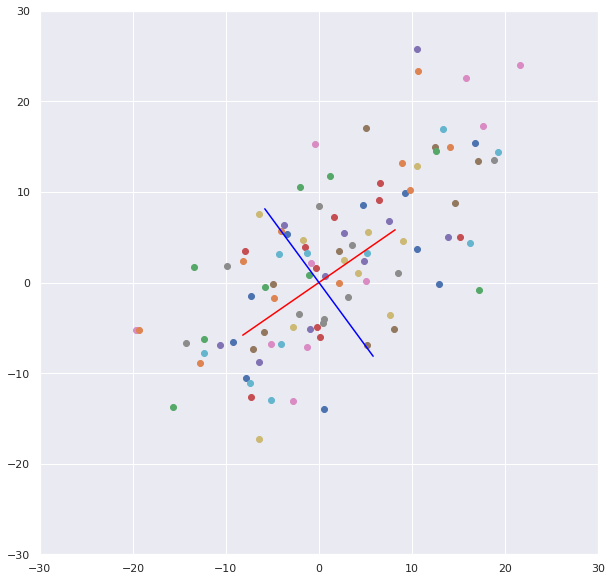

In [3]:
plt.figure(figsize=(10,10))
import matplotlib.pyplot as plt
for i in range(l):
    plt.scatter(data[i][0],data[i][1])

color = ['red', 'blue']
label = ['PCA1', 'PCA2']
for i in range(2):
    plt.plot([-10*wt[i][0],0*wt[i][0],10*wt[i][0]], [-10*wt[i][1],0*wt[i][1],10*wt[i][1]], color=color[i], label=label[i])
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()